In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
np.random.seed(121)

%matplotlib inline

train_csv = '/home1/himanshu/CheXpert-v1.0/train.csv'
valid_csv = '/home1/himanshu/CheXpert-v1.0/valid.csv'


In [ ]:

valid_df = pd.read_csv(valid_csv).fillna(0)
valid_df.to_csv('data/valid.csv', index=False)

count = valid_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)



In [2]:
valid_df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

No Finding          22381.0
Cardiomegaly        18913.0
Edema               39262.0
Consolidation      -12959.0
Atelectasis          -363.0
Pleural Effusion    74559.0
dtype: float64


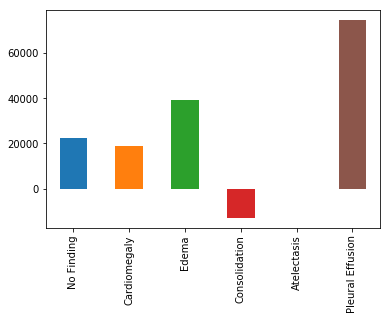

In [3]:
train_df = pd.read_csv(train_csv).fillna(0)
train_df.to_csv('data/train.csv', index=False)

count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)


  0%|          | 4/223414 [00:00<1:53:02, 32.94it/s]

CheXpert-v1.0/train/patient00001/study1/view1_frontal.jpg


100%|██████████| 223414/223414 [1:47:36<00:00, 34.61it/s]


No Finding          22381.0
Cardiomegaly        10730.0
Edema               60947.0
Consolidation       32231.0
Atelectasis         55382.0
Pleural Effusion    74559.0
dtype: float64


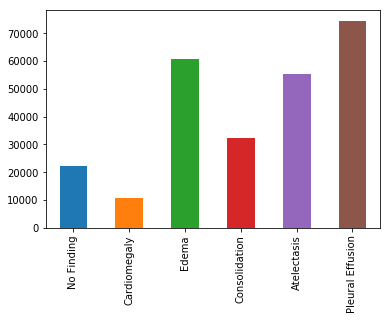

In [4]:
train_df = pd.read_csv(train_csv).fillna(0)
for idx in tqdm(range(len(train_df))):
    for i in range(14):
        if train_df.loc[idx, 'Lung Opacity'] != -1:
            if train_df.loc[idx, 'Atelectasis'] == -1:
                train_df.loc[idx, 'Atelectasis'] = train_df.loc[idx, 'Lung Opacity']
            if train_df.loc[idx, 'Lung Lesion'] == -1:
                train_df.loc[idx, 'Lung Lesion'] = train_df.loc[idx, 'Lung Opacity']
            if train_df.loc[idx, 'Pneumonia'] == -1:
                train_df.loc[idx, 'Pneumonia'] = train_df.loc[idx, 'Lung Opacity']
            if train_df.loc[idx, 'Consolidation'] == -1:
                train_df.loc[idx, 'Consolidation'] = train_df.loc[idx, 'Lung Opacity']
            if train_df.loc[idx, 'Edema'] == -1:
                train_df.loc[idx, 'Edema'] = train_df.loc[idx, 'Lung Opacity']
        if train_df.loc[idx, 'Consolidation'] != -1:
            train_df.loc[idx, 'Pneumonia'] = train_df.loc[idx, 'Consolidation']
        if train_df.loc[idx, 'Enlarged Cardiomediastinum'] != -1:
            train_df.loc[idx, 'Cardiomegaly'] = train_df.loc[idx, 'Enlarged Cardiomediastinum']
                
train_df.to_csv('data/train_hrc.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

No Finding          22381.0
Cardiomegaly        27000.0
Edema               52246.0
Consolidation       14783.0
Atelectasis         33376.0
Pleural Effusion    86187.0
dtype: float64


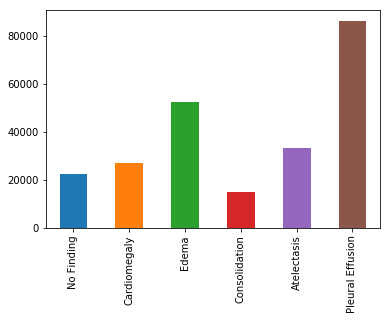

In [5]:
train_df = pd.read_csv(train_csv).fillna(0).replace({-1:0})
train_df.to_csv('data/train-u0.csv', index=False)

count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)




No Finding          22381.0
Cardiomegaly        11109.0
Edema               61335.0
Consolidation       33268.0
Atelectasis         57801.0
Pleural Effusion    86187.0
dtype: float64


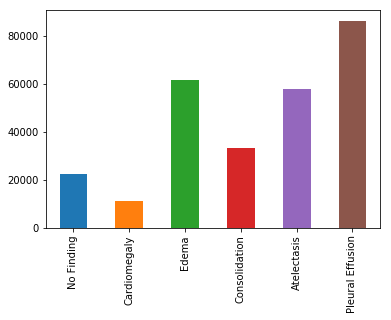

In [6]:
train_df = pd.read_csv('data/train_hrc.csv').fillna(0).replace({-1:0})
train_df.to_csv('data/train_hrc-u0.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

No Finding          22381.0
Cardiomegaly        35087.0
Edema               65230.0
Consolidation       42525.0
Atelectasis         67115.0
Pleural Effusion    97815.0
dtype: float64


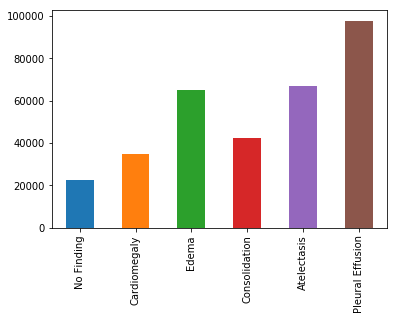

In [7]:
train_df = pd.read_csv(train_csv).fillna(0).replace({-1:1})
train_df.to_csv('data/train-u1.csv', index=False)

count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

No Finding          22381.0
Cardiomegaly        11488.0
Edema               61723.0
Consolidation       34305.0
Atelectasis         60220.0
Pleural Effusion    97815.0
dtype: float64


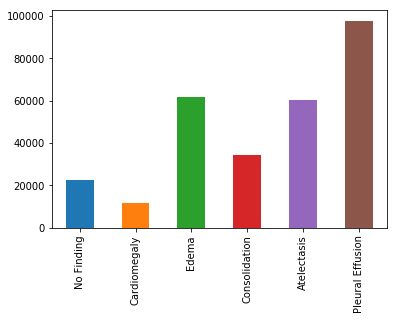

In [8]:
train_df = pd.read_csv('data/train_hrc.csv').fillna(0).replace({-1:1})
train_df.to_csv('data/train_hrc-u1.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

100%|██████████| 223414/223414 [03:26<00:00, 1084.16it/s]


No Finding          22381.000000
Cardiomegaly        32648.887624
Edema               61322.761361
Consolidation       34216.998002
Atelectasis         56976.963462
Pleural Effusion    94337.911508
dtype: float64


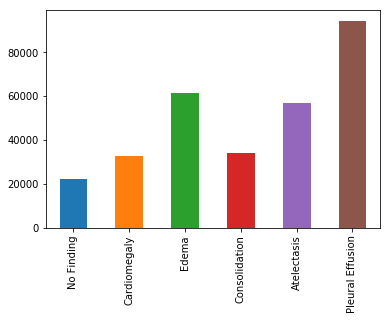

In [9]:
train_df = pd.read_csv(train_csv).fillna(0)
for idx in tqdm(range(len(train_df))):
    for i in range(14):
        if train_df.iloc[idx, 5+i] == -1:
            train_df.iloc[idx, 5+i] = np.random.uniform(0.55, 0.85, size = 1)[0]
    
train_df.to_csv('data/train-u1-lsr.csv', index=False)

count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
# train_df
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)





No Finding          22271.0
Cardiomegaly        17851.0
Edema               35756.0
Consolidation        8716.0
Atelectasis         23749.0
Pleural Effusion    55837.0
dtype: float64


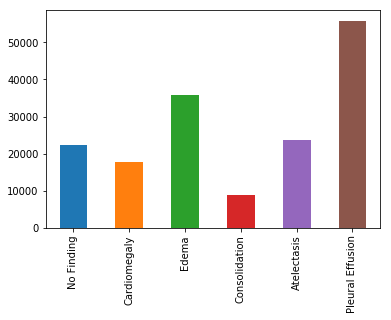

In [10]:
train_df = pd.read_csv(train_csv).fillna(0).replace({-1: np.NaN}).dropna()
train_df.to_csv('data/train-uI.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)



No Finding          22271.0
Cardiomegaly         9588.0
Edema               54856.0
Consolidation       27924.0
Atelectasis         49724.0
Pleural Effusion    78521.0
dtype: float64


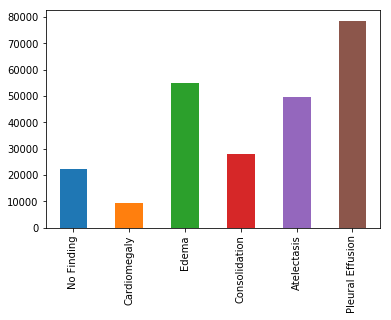

In [11]:
train_df = pd.read_csv('data/train_hrc.csv').fillna(0).replace({-1: np.NaN}).dropna()
train_df.to_csv('data/train_hrc-uI.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)


No Finding          12413
Cardiomegaly        15142
Edema               41896
Consolidation         381
Atelectasis          2071
Pleural Effusion    87116
dtype: int64


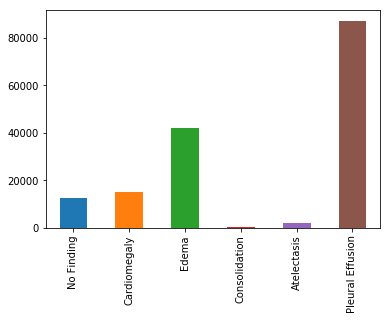

In [25]:
train_df = pd.read_csv('results/u1_predictions_baseline-u0+u1+uI.csv')#.fillna(0)
# train_df.to_csv('data/train_hrc-uI.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)



100%|██████████| 223414/223414 [02:50<00:00, 1306.84it/s]


No Finding          22381.0
Cardiomegaly        28139.0
Edema               56822.0
Consolidation       14800.0
Atelectasis         33817.0
Pleural Effusion    90929.0
dtype: float64


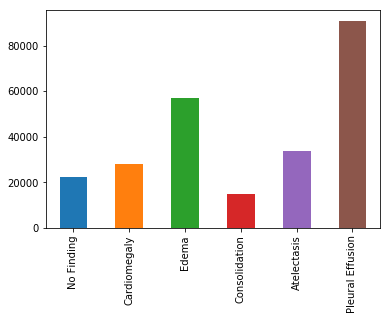

In [2]:
train_df = pd.read_csv('data/train.csv').fillna(0)
retrain_df = pd.read_csv('results/u1_predictions_baseline-u0+u1+uI.csv')
train_df = train_df[['Path', 'No Finding', 'Cardiomegaly', 'Edema', 'Consolidation',
       'Atelectasis', 'Pleural Effusion', 'Enlarged Cardiomediastinum',
       'Lung Opacity', 'Lung Lesion', 'Pneumonia', 'Pneumothorax',
       'Pleural Other', 'Fracture', 'Support Devices']]
for idx in tqdm(range(len(train_df))):
    for i in range(14):
        if train_df.iloc[idx, 1+i] == -1:
            train_df.iloc[idx, 1+i] = retrain_df.iloc[idx, 1+i]
train_df.to_csv('data/retrain.csv', index=False)
count = train_df[['No Finding', 'Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)




100%|██████████| 223414/223414 [02:46<00:00, 1342.57it/s]


No Finding                     22381.0
Cardiomegaly                   27000.0
Edema                          65230.0
Consolidation                  14783.0
Atelectasis                    67115.0
Pleural Effusion               97815.0
Enlarged Cardiomediastinum     23201.0
Lung Opacity                  111179.0
Lung Lesion                     9186.0
Pneumonia                       6039.0
Pneumothorax                   19448.0
Pleural Other                   3523.0
Fracture                        9040.0
Support Devices               116001.0
dtype: float64


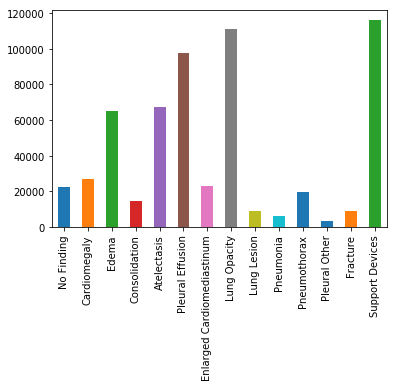

In [3]:
train_df = pd.read_csv('data/train.csv').fillna(0)
label_mappings = {'No Finding': 1, 'Cardiomegaly':0, 'Edema':1, 'Consolidation':0,
       'Atelectasis':1, 'Pleural Effusion':1, 'Enlarged Cardiomediastinum':1,
       'Lung Opacity':1, 'Lung Lesion':0, 'Pneumonia':0, 'Pneumothorax':0,
       'Pleural Other':0, 'Fracture':0, 'Support Devices':0}
for idx in tqdm(range(len(train_df))):
    for lbl in label_mappings.keys():
        if train_df.loc[idx, lbl] == -1:
            train_df.loc[idx, lbl] = label_mappings[lbl]
train_df.to_csv('data/train-opt.csv', index=False)
count = train_df[list(label_mappings.keys())]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

100%|██████████| 223414/223414 [03:33<00:00, 1048.41it/s]


No Finding                     22381.000000
Cardiomegaly                   28216.245476
Edema                          61324.939590
Consolidation                  18957.716337
Atelectasis                    57008.744912
Pleural Effusion               94342.403699
Enlarged Cardiomediastinum     19472.950668
Lung Opacity                  109509.799311
Lung Lesion                     9397.344470
Pneumonia                       8853.046830
Pneumothorax                   19925.696827
Pleural Other                   3915.571991
Fracture                        9138.118980
Support Devices               116160.258754
dtype: float64


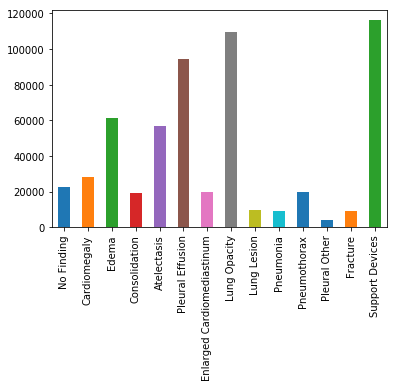

In [7]:
train_df = pd.read_csv('data/train.csv').fillna(0)
label_mappings = {'No Finding': 1, 'Cardiomegaly':0, 'Edema':1, 'Consolidation':0,
       'Atelectasis':1, 'Pleural Effusion':1, 'Enlarged Cardiomediastinum':1,
       'Lung Opacity':1, 'Lung Lesion':0, 'Pneumonia':0, 'Pneumothorax':0,
       'Pleural Other':0, 'Fracture':0, 'Support Devices':0}
for idx in tqdm(range(len(train_df))):
    for lbl in label_mappings.keys():
        if train_df.loc[idx, lbl] == -1:
            if label_mappings[lbl] == 1:
                train_df.loc[idx, lbl] = np.random.uniform(0.55, 0.85, size = 1)[0]
            if label_mappings[lbl] == 0:
                train_df.loc[idx, lbl] = np.random.uniform(0, 0.30, size = 1)[0]
train_df.to_csv('data/train-opt-lsr.csv', index=False)
count = train_df[list(label_mappings.keys())]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)

No Finding                    0.070044
Cardiomegaly                  0.044449
Edema                         0.070733
Consolidation                 0.054563
Atelectasis                   0.121914
Pleural Effusion              0.092221
Enlarged Cardiomediastinum    0.054037
Lung Opacity                  0.190965
Lung Lesion                   0.027609
Pneumonia                     0.032167
Pneumothorax                  0.032541
Pleural Other                 0.005366
dtype: float64


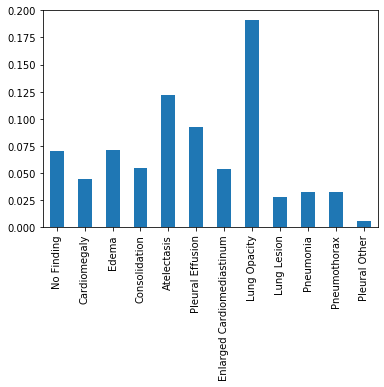

In [10]:
var_path = 'results/kendall.2-u0+u1/'

train_df = pd.read_csv(var_path+'var.csv')
label_mappings = {'No Finding': 1, 'Cardiomegaly':0, 'Edema':1, 'Consolidation':0,
       'Atelectasis':1, 'Pleural Effusion':1, 'Enlarged Cardiomediastinum':1,
       'Lung Opacity':1, 'Lung Lesion':0, 'Pneumonia':0, 'Pneumothorax':0,
       'Pleural Other':0}

fig = plt.figure()
count = train_df[list(label_mappings.keys())]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)
plt.savefig(var_path+'var.png', bbox_inches='tight')

No Finding                        0.0
Cardiomegaly                   8087.0
Edema                         12984.0
Consolidation                 27742.0
Atelectasis                   33739.0
Pleural Effusion              11628.0
Enlarged Cardiomediastinum    12403.0
Lung Opacity                   5598.0
Lung Lesion                    1488.0
Pneumonia                     18770.0
Pneumothorax                   3145.0
Pleural Other                  2653.0
dtype: float64


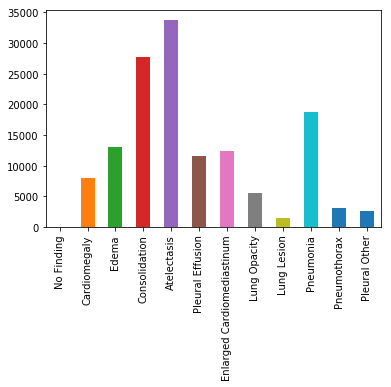

In [11]:
train_df = pd.read_csv('data/train.csv').fillna(0).replace({1:0, -1:1})
label_mappings = {'No Finding': 1, 'Cardiomegaly':0, 'Edema':1, 'Consolidation':0,
       'Atelectasis':1, 'Pleural Effusion':1, 'Enlarged Cardiomediastinum':1,
       'Lung Opacity':1, 'Lung Lesion':0, 'Pneumonia':0, 'Pneumothorax':0,
       'Pleural Other':0}

count = train_df[list(label_mappings.keys())]
count = count.sum(axis = 0, skipna = True)
count.plot(kind='bar')
print(count)